In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}

# 1. Récupération du Contenu HTML
url = "https://www.imdb.com/chart/moviemeter/"
response = requests.get(url, headers=headers)

In [71]:
response.headers

{'Content-Type': 'text/html; charset=utf-8', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'Server': 'Server', 'Date': 'Mon, 20 Nov 2023 13:28:27 GMT', 'x-amz-rid': 'ZNYZ8WYY3XB2VZ6C5DXT', 'set-cookie': 'session-id=139-5395156-6215207; Domain=.imdb.com; Expires=Tue, 01 Jan 2036 08:00:01 GMT; Path=/, session-id-time=2082787201l; Domain=.imdb.com; Expires=Tue, 01 Jan 2036 08:00:01 GMT; Path=/, next-sid=tatAaMUg2qjBBum2BdPeQ; Path=/; Expires=Thu, 01 Jan 1970 00:00:00 GMT; HttpOnly', 'content-security-policy': "frame-ancestors 'self' imdb.com *.imdb.com *.media-imdb.com withoutabox.com *.withoutabox.com amazon.com *.amazon.com amazon.co.uk *.amazon.co.uk amazon.de *.amazon.de translate.google.com images.google.com www.google.com www.google.co.uk search.aol.com bing.com www.bing.com", 'x-frame-options': 'SAMEORIGIN', 'x-xss-protection': '1; mode=block', 'ETag': '"xujwmogjhuzffz"', 'Cache-Control': 'private, no-cache, no-store, max-age=0, must-revalidate', 'Content-Encoding': '

In [72]:
html_content = response.content
html_content

b'<!DOCTYPE html><html lang="en-US" xmlns:og="http://opengraphprotocol.org/schema/" xmlns:fb="http://www.facebook.com/2008/fbml"><head><meta charSet="utf-8"/><meta name="viewport" content="width=device-width"/><script>if(typeof uet === \'function\'){ uet(\'bb\', \'LoadTitle\', {wb: 1}); }</script><script>window.addEventListener(\'load\', (event) => {\n        if (typeof window.csa !== \'undefined\' && typeof window.csa === \'function\') {\n            var csaLatencyPlugin = window.csa(\'Content\', {\n                element: {\n                    slotId: \'LoadTitle\',\n                    type: \'service-call\'\n                }\n            });\n            csaLatencyPlugin(\'mark\', \'clickToBodyBegin\', 1700486907534);\n        }\n    })</script><title>Most Popular Movies</title><meta name="description" content="As determined by IMDb users" data-id="main"/><meta property="og:site_name" content="IMDb"/><meta property="og:title" content="Most Popular Movies"/><meta property="og:des

In [4]:
soup = BeautifulSoup(open('dataexercice.html','r'), "html.parser")

In [74]:
len(soup.find_all("ul"))

16

In [11]:
len(soup.find_all('ul', class_="ipc-metadata-list"))

1

In [80]:
ul = soup.find_all('ul', class_="ipc-metadata-list")

In [76]:
ul

<ul class="ipc-metadata-list ipc-metadata-list--dividers-between sc-9d2f6de0-0 iMNUXk compact-list-view ipc-metadata-list--base" role="presentation"><li class="ipc-metadata-list-summary-item sc-59b6048d-0 cuaJSp cli-parent"><div class="sc-69807ba5-0 fUVZzz cli-poster-container"><div class="ipc-poster ipc-poster--base ipc-poster--dynamic-width ipc-sub-grid-item ipc-sub-grid-item--span-2" role="group"><div aria-label="add to watchlist" class="ipc-watchlist-ribbon ipc-focusable ipc-watchlist-ribbon--s ipc-watchlist-ribbon--base ipc-watchlist-ribbon--loading ipc-watchlist-ribbon--onImage ipc-poster__watchlist-ribbon" role="button" tabindex="0"><svg class="ipc-watchlist-ribbon__bg" height="34px" role="presentation" viewbox="0 0 24 34" width="24px" xmlns="http://www.w3.org/2000/svg"><polygon class="ipc-watchlist-ribbon__bg-ribbon" fill="#000000" points="24 0 0 0 0 32 12.2436611 26.2926049 24 31.7728343"></polygon><polygon class="ipc-watchlist-ribbon__bg-hover" points="24 0 0 0 0 32 12.243661

In [91]:
img = []
title = []
year = []
time = []
desc = []
note = []

if ul:
    for li in ul[0].find_all("li"):
        
        if li.find('img', class_='ipc-image'):
            img.append(li.find('img', class_='ipc-image')['src'])
        else:
            img.append("Aucune image")


        
            
        title.append(li.find('h3', class_='ipc-title__text').text)
        meta = li.find_all(class_='cli-title-metadata-item')

        

        
        if len(meta)>0:
            year.append(meta[0].text)
        else:
            year.append("Non connu")
            
        if len(meta)>1:
            if meta[1].text.split(" ")[0][-1]=="h":
                time.append(meta[1].text)

            else:
                time.append("Non connu")
                desc.append(meta[1].text)
        else:
            time.append("Non connu")

        if len(meta)>2:
            desc.append(meta[2].text)
        else:
            if len(desc) < len(time):
                desc.append("non connu")
            
        note.append(li.find('span', class_='ipc-rating-star').text)

        #nouvelle_ligne = pd.DataFrame.from_dict({'Titre': title.text, 'Annee': year, 'Duree': time, 'Description':desc, 'Note':note.text, 'Icone':img['src']})
        #print(img['src'])
        #print(title.text)
        #print(note.text)
        #print(nouvelle_ligne)
        #print(img, title, year, time, desc, note)
        #break

print(len(img), len(title), len(year), len(time), len(desc), len(note))
df = pd.DataFrame({'Titre': title, 'Annee': year, 'Duree': time, 'Description':desc, 'Note':note, 'Icone':img})

100 100 100 100 100 100


In [5]:
df

NameError: name 'df' is not defined

In [22]:
to_plot = df.groupby("Annee")["Titre"].count()

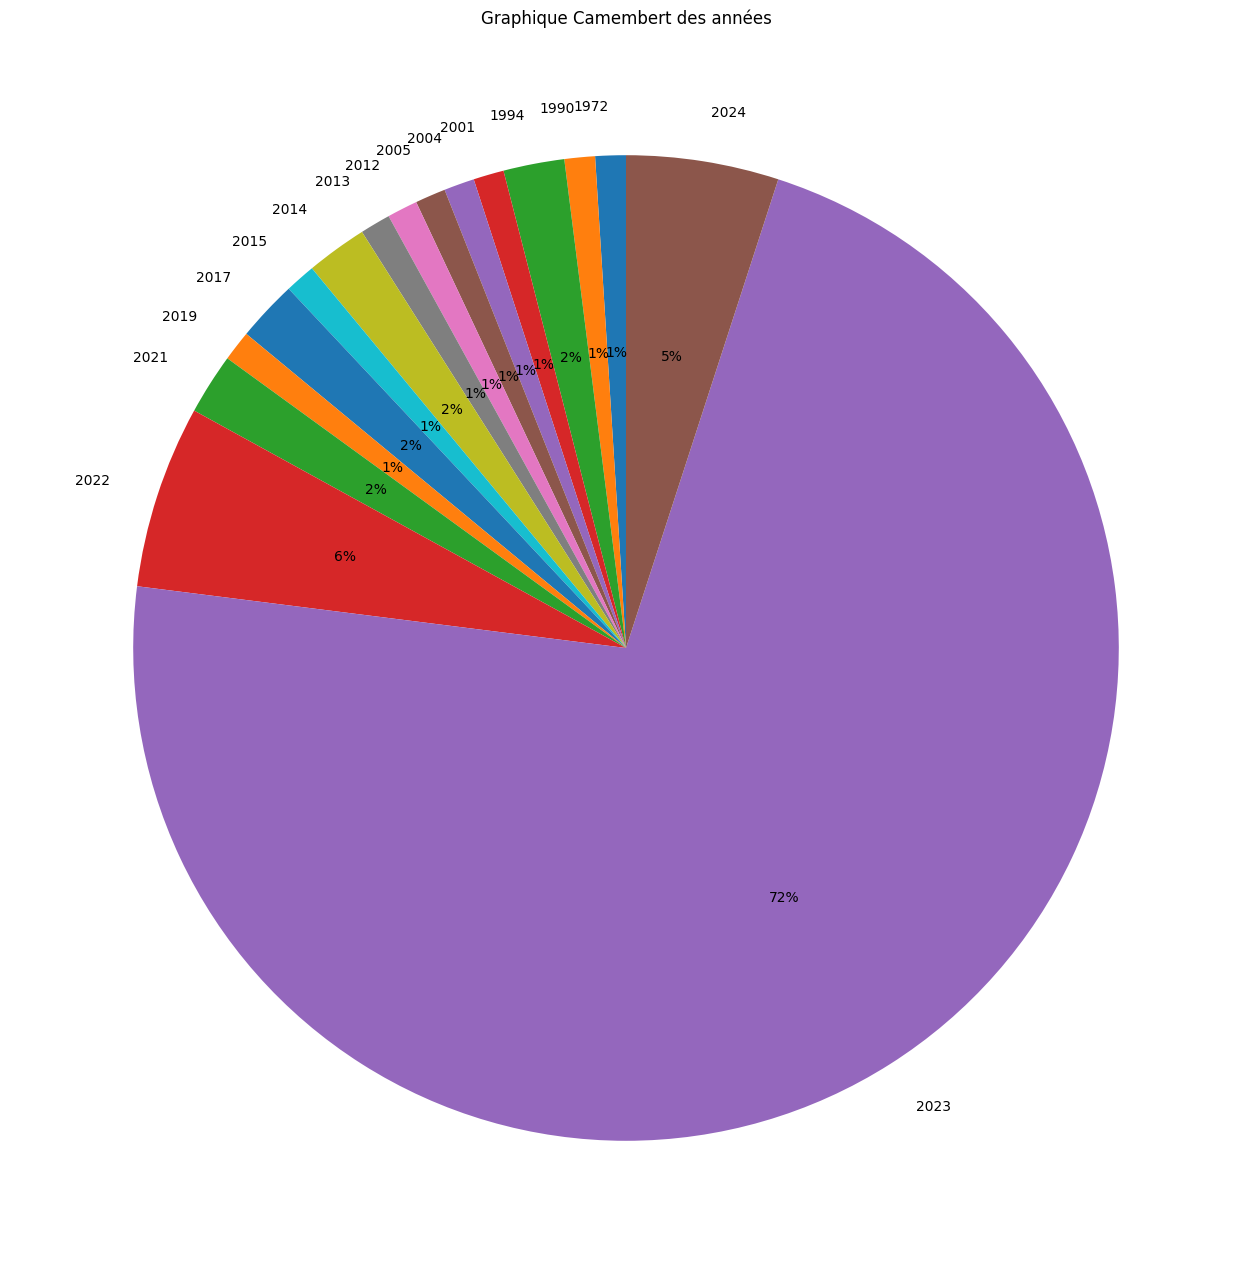

In [23]:
plt.figure(figsize=(16, 16))
plt.pie(to_plot.array, labels=to_plot.index, autopct='%1.0f%%', startangle=90)
plt.title('Graphique Camembert des années')
plt.show()

['1h', '45m']

In [48]:
def convert_to_minutes(hour):
    if hour == "Non connu":
        return 0

    list_hour = hour.split(" ")

    hour_int = int(list_hour[0][:-1]) #[:len(list_hour[0])-1]

    minute_int = 0
    if len(list_hour) >1:
        minute_int = int(list_hour[1][:-1])
    
    return hour_int*60 + minute_int

'3h 26m'

In [40]:
convert_to_minutes(df["Duree"][3])

206

In [61]:
df["Duree_minute"] = df["Duree"].apply(convert_to_minutes)

In [62]:
df

,Titre,Annee,Duree,Description,Note,Icone,Duree_minute
0,The Marvels,2023,1h 45m,Tous publics,6.0 (47K),https://m.media-amazon.com/images/M/MV5BZTcxYW...,105
1,Five Nights at Freddy's,2023,1h 49m,PG-13,5.5 (68K),https://m.media-amazon.com/images/M/MV5BNDg3OT...,109
2,The Killer,2023,1h 58m,16,6.9 (89K),https://m.media-amazon.com/images/M/MV5BZGJkMD...,118
3,Killers of the Flower Moon,2023,3h 26m,Tous publics avec avertissement,8.0 (91K),https://m.media-amazon.com/images/M/MV5BMzI4Mm...,206
4,Mystère à Venise,2023,1h 43m,Tous publics avec avertissement,6.6 (61K),https://m.media-amazon.com/images/M/MV5BYjg4OW...,103
...,...,...,...,...,...,...,...
95,Le Manoir hanté,2023,2h 3m,Tous publics,6.1 (36K),https://m.media-amazon.com/images/M/MV5BZDAzZj...,123
96,Pulp Fiction,1994,2h 34m,12,8.9 (2.2M),https://m.media-amazon.com/images/M/MV5BMjc2OD...,154
97,La momie,2017,1h 51m,Tous publics,5.4 (202K),https://m.media-amazon.com/images/M/MV5BZmNmZm...,111
98,How to Have Sex,2023,1h 31m,non connu,7.0 (1.4K),https://m.media-amazon.com/images/M/MV5BNWZiYz...,91


In [64]:
len(df[df["Duree_minute"]>=120])

41

In [ ]:
https://www.pagesjaunes.fr/activites/kinesitherapeute.html